In [2]:
pip install plotnine --user

  Using cached plotnine-0.8.0-py3-none-any.whl (4.7 MB)
  Using cached statsmodels-0.12.2-cp38-none-win_amd64.whl (9.4 MB)
  Using cached mizani-0.7.3-py3-none-any.whl (63 kB)
  Using cached palettable-3.3.0-py2.py3-none-any.whl (111 kB)
Note: you may need to restart the kernel to use updated packages.


In [57]:
from plotnine import *
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
import numpy as np

In [4]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)


In [5]:
print(df.columns)
df.head()
df.shape

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')


(569, 31)

In [6]:
features = df.columns[0:30] #grab all numeric columns of interest
z = StandardScaler()
df[features] = z.fit_transform(df[features])

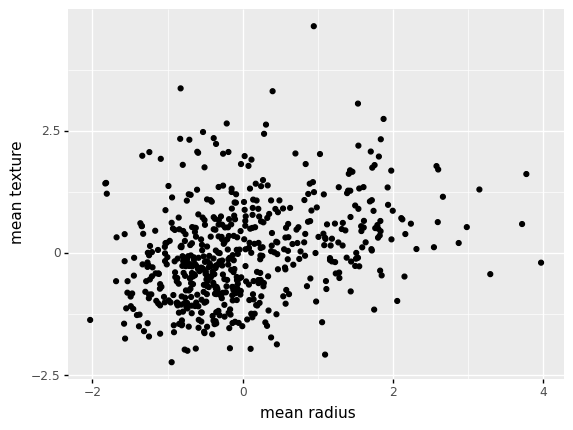

<ggplot: (118952507450)>

In [7]:
ggplot(df, aes(x = "mean radius", y = "mean texture")) + geom_point()

In [8]:
pca = PCA()
pca.fit(df[features])
pca.explained_variance_ratio_ #tune pca


array([4.42720256e-01, 1.89711820e-01, 9.39316326e-02, 6.60213492e-02,
       5.49576849e-02, 4.02452204e-02, 2.25073371e-02, 1.58872380e-02,
       1.38964937e-02, 1.16897819e-02, 9.79718988e-03, 8.70537901e-03,
       8.04524987e-03, 5.23365745e-03, 3.13783217e-03, 2.66209337e-03,
       1.97996793e-03, 1.75395945e-03, 1.64925306e-03, 1.03864675e-03,
       9.99096464e-04, 9.14646751e-04, 8.11361259e-04, 6.01833567e-04,
       5.16042379e-04, 2.72587995e-04, 2.30015463e-04, 5.29779290e-05,
       2.49601032e-05, 4.43482743e-06])

In [9]:
pcaDF = pd.DataFrame({"pc": range(1,31),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.442720,0.442720
1,2,0.189712,0.632432
2,3,0.093932,0.726364
3,4,0.066021,0.792385
4,5,0.054958,0.847343


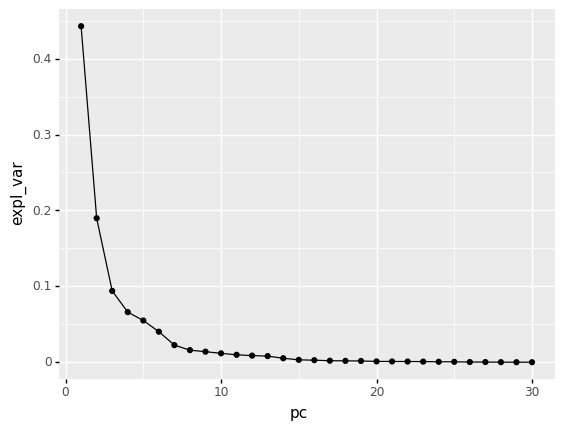

<ggplot: (118952871415)>

In [10]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

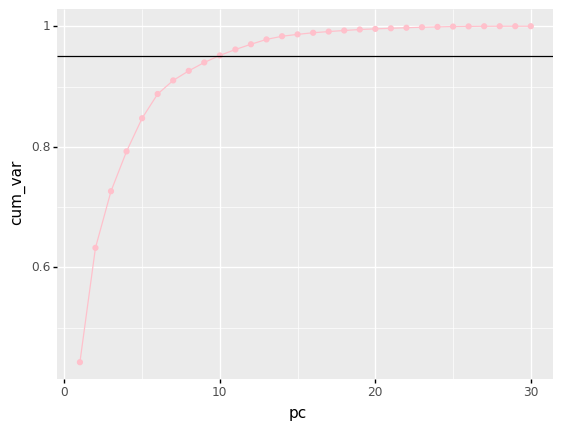

<ggplot: (118952798669)>

In [11]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [12]:
data = pca.transform(df[features])
df4 = pd.DataFrame(data[:,0:4])


df10 = pd.DataFrame(data[:, 0:10])

#modeMod1
lr1 = LogisticRegression()
lr1.fit(df[features], df["target"])
print("all data: ", lr1.score(df[features], df["target"]))

#modeMod1
lr2 = LogisticRegression()
lr2.fit(df10, df["target"])
print("10 PCs:   ", lr2.score(df10, df["target"]))

#modeMod1
lr3 = LogisticRegression()
lr3.fit(df4, df["target"])
print("4 PCs:    ", lr3.score(df4, df["target"]))

all data:  0.9876977152899824
10 PCs:    0.9859402460456942
4 PCs:     0.9701230228471002


## Another Implementation on another dataset with different k.

In [45]:
from sklearn.datasets import load_boston
data2 = load_boston()
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['target'] = pd.Series(data2.target)


In [46]:
print(df2.columns)
df2.head()
df2.shape

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'target'],
      dtype='object')


(506, 14)

In [47]:
features2 = df2.columns[0:13] #grab all numeric columns of interest
z2 = StandardScaler()
df2[features2] = z2.fit_transform(df2[features2])

In [48]:
df2.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


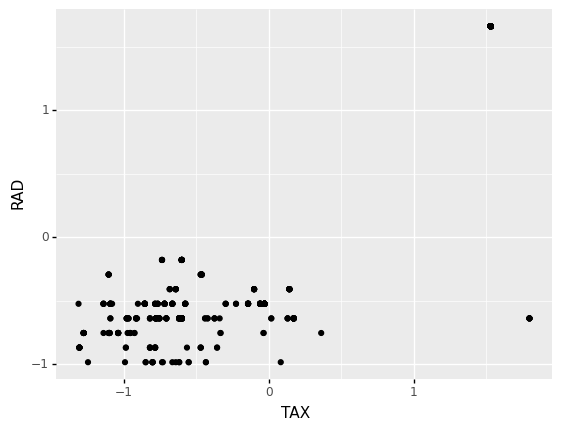

<ggplot: (140382239498)>

In [49]:
ggplot(df2, aes(x = "TAX", y = "RAD")) + geom_point()

In [50]:
pca = PCA()
pca.fit(df2[features2])
pca.explained_variance_ratio_ #tune pca


array([0.47129606, 0.11025193, 0.0955859 , 0.06596732, 0.06421661,
       0.05056978, 0.04118124, 0.03046902, 0.02130333, 0.01694137,
       0.0143088 , 0.01302331, 0.00488533])

In [51]:
pcaDF = pd.DataFrame({"pc": range(1,14),"expl_var" : pca.explained_variance_ratio_,  "cum_var": pca.explained_variance_ratio_.cumsum()})
pcaDF.head()

,pc,expl_var,cum_var
0,1,0.471296,0.471296
1,2,0.110252,0.581548
2,3,0.095586,0.677134
3,4,0.065967,0.743101
4,5,0.064217,0.807318


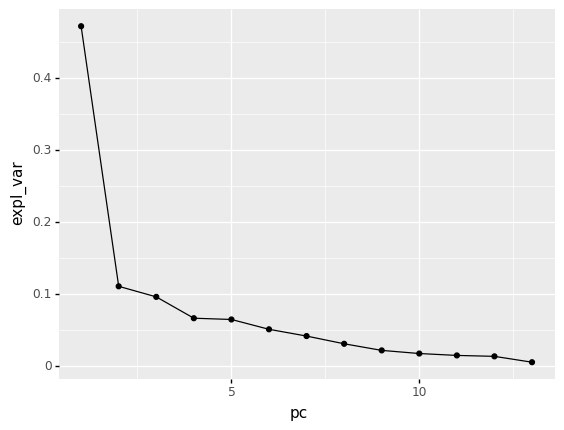

<ggplot: (140382418993)>

In [52]:
(ggplot(pcaDF, aes(x = "pc", y = "expl_var")) + geom_line() + geom_point())

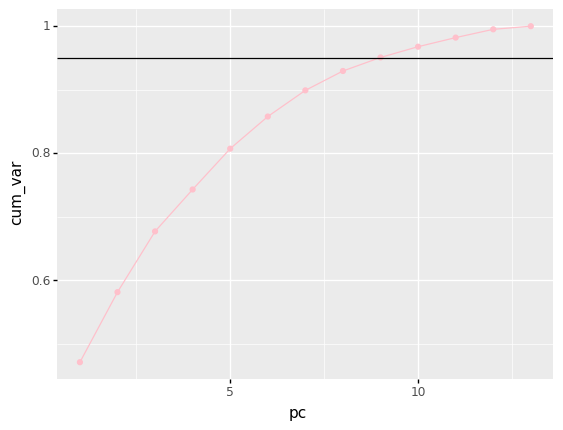

<ggplot: (140382030562)>

In [53]:
(ggplot(pcaDF, aes(x = "pc", y = "cum_var")) + geom_line(color = "pink") +
 geom_point(color = "pink") + geom_hline(yintercept = 0.95))

In [54]:
df2["target"].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: target, dtype: float64

In [55]:
# from sklearn import preprocessing
# from sklearn import utils

# lab_enc = preprocessing.LabelEncoder()
# encoded = lab_enc.fit_transform(df2["target"])
# encoded

In [58]:
data2 = pca.transform(df2[features2])
df5 = pd.DataFrame(data2[:, 0:5])


df10 = pd.DataFrame(data2[:, 0:8])


#modeMod1
lr11 = LinearRegression()
lr11.fit(df2[features2], df2["target"])
print("all data: ", lr11.score(df2[features2], df2["target"]))

#modeMod1
lr22 = LinearRegression()
lr22.fit(df10, df2["target"])
print("10 PCs:   ", lr22.score(df10, df2["target"]))

#modeMod1
lr33 = LinearRegression()
lr33.fit(df5, df2["target"])
print("5 PCs:    ", lr33.score(df5, df2["target"]))

all data:  0.7406426641094095
10 PCs:    0.7055977712036576
5 PCs:     0.6969794221303116
